In [1]:
# Written by Chetan Mandloi (VU3ULH)
# Importing the required libraries
import pandas as pd                        # For dataframes, reading html 
import matplotlib.pyplot as plt            # For Plotting

In [2]:
#Get current Delegate list from hamfest website
#Please use higher end number in the url in registered candidates go over 1500
hams = pd.read_html('http://www.hamfestindia2018.com/Delegates/List?start=0&end=1500')[0]

In [3]:
#hams

In [4]:
#Just formatting the dataframe properly
hams = hams.rename(columns=hams.iloc[0])
hams = hams.drop([0])
hams

,#,Delegate Code,Callsign,Name,Gender,City,State,Country
1,1401,HFI00001,VU2ZRJ,Dr.Rajan Sinha,Old Man,NaN,NaN,India
2,1402,HFI00002,VU3UEH,Dr.M Rangarao,Old Man,Vijayawada,Andhra Pradesh,India
3,1403,HFI00003,VU3ZHN,Samar Jynar,Old Man,NaN,NaN,India
4,1404,HFI00004,VU3LOH,K.Lohita,Old Man,Vijayawada,NaN,India
5,1405,HFI00005,VU3OXI,T Ravi Teja,Old Man,NaN,NaN,India
6,1406,HFI00006,VU2TBM,T.B.M.Madhu Mohan Rao,Old Man,NaN,NaN,India
7,1407,HFI00007,VU3ZKR,K.Ramesh,Old Man,NaN,NaN,India
8,1408,HFI00008,VU3HMB,Prakash Modh,Old Man,NaN,NaN,India
9,1409,HFI00009,VU3OGP,Snahail,Old Man,NaN,NaN,India
10,1410,HFI00010,VU2JAU,Jayu Bhide,Old Man,Gwalior,NaN,India


In [5]:
#hams['Gender']

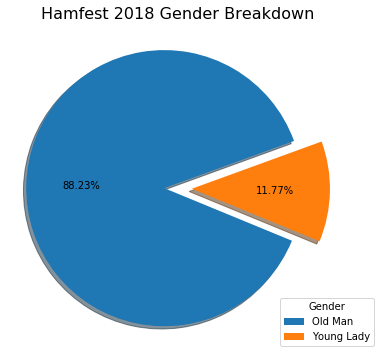

In [6]:
# Pie Chart Showing gender breakdown
gend = hams['Gender'].value_counts()
fig1,ax1 = plt.subplots()
ax1.pie(gend, explode = (0,0.2), autopct='%1.2f%%',
       shadow = True, startangle = 20)
ax1.legend(('Old Man','Young Lady'),title ='Gender', loc = 'lower right',bbox_to_anchor = (1,0,0.1,1))
ax1.axis('equal')
fig1.set_figheight(6)
fig1.set_figwidth(6)
plt.title("Hamfest 2018 Gender Breakdown", fontdict= {'fontsize': 16,
                                     'fontweight' : 5,
                                     'verticalalignment': 'baseline','horizontalalignment': 'center'})
plt.show()

In [7]:
# Correcting all the various conflicting state names,
# You might think why I didn't just convert everything to same case but just case correction
# would not have fixed other errors like spelling mistakes, and improper state names like
# people who made typos like tamilandu, TN, Gujrat etc
#
# NOTE SOME ENTRIES IN THE BEGINING ARE NaN. THESE ARE BEING IGNORED
#
refined_hams = hams['State'].replace(["Dharwad", "Tamilnadu","KARNATAKA","karnataka","KERALA","ANDHRA PRADESH","TAMIL NADU",
                                      "TAMILNADU","Telengana","GUJRAT","GUJARAT","MAHARASHTRA","WEST BENGAL",
                                     "ANDHRAPRADESH","TELANGANA","KERALA STATE","Tamil nadu","Maharastra","KARANTAKA",
                                      "kerala","tamil nadu","KARANATAKA","Andhrapradesh","Tamilandu","KARANATKA",
                                     "TN","Tamilnadu ,Trichy 620004.","ODISHA",'MAHARASTRA','ANDRA PRADESH',
                                     "MANGALAPURAM ROAD","Near Kerala Govt. NGO Quarters",'UTTAR PRADESH','DELHI',"Gujrat",
                                     "Near Grindwell Norton","telangana",'BIHAR',"Maharasatra","New Delhi"],
                      ["Karnataka", "Tamil Nadu","Karnataka","Karnataka","Kerala","Andhra Pradesh","Tamil Nadu",
                       "Tamil Nadu","Telangana","Gujarat","Gujarat","Maharastra","West Bengal",
                      "Andhra Pradesh","Telangana","Kerala","Tamil Nadu","Maharastra","Karnataka",
                       "Kerala","Tamil Nadu", "Karnataka","Andhra Pradesh","Tamil Nadu","Karnataka",
                       "Tamil Nadu","Tamil Nadu","Odisha","Maharastra","Andhra Pradesh",
                       "Kerala","Kerala",'Uttar Pradesh',"Delhi","Gujarat",
                       "Karnataka","Telangana",'Bihar',"Maharastra","Delhi"
                      ])
#refined_hams

In [8]:
states = refined_hams.value_counts()
states

Karnataka         688
Kerala            161
Tamil Nadu        160
Andhra Pradesh     71
Maharashtra        51
Telangana          32
Maharastra         26
Gujarat            26
West Bengal        23
Bihar               8
USA                 7
Uttar Pradesh       6
Rajasthan           5
Delhi               3
Puducherry          3
Assam               3
Jharkhand           3
Odisha              2
Goa                 2
ONTARIO             2
Chicago             1
Chhattisgarh        1
Madhya Pradesh      1
Haryana             1
Tripura             1
Doha                1
India               1
Manipur             1
Name: State, dtype: int64

In [9]:
major_states = states[:9]
major_states["Others"]= states[9:].sum()
#major_states.index

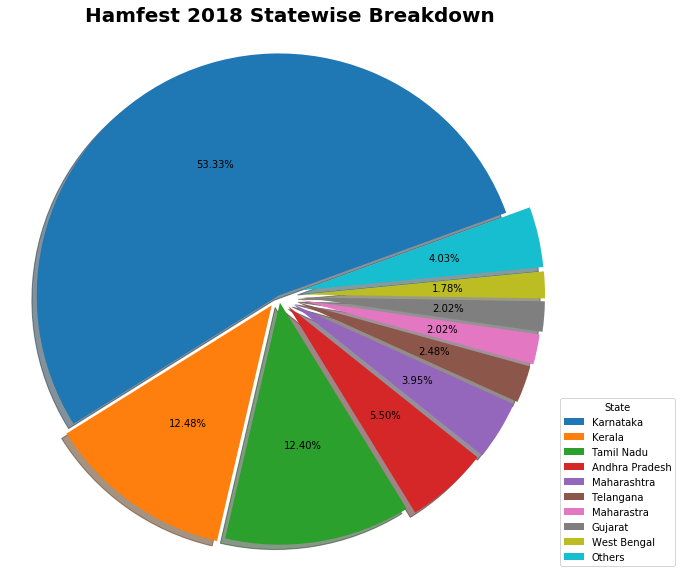

In [10]:
# Pie Chart Showing statewide distribution
fig1,ax1 = plt.subplots()
ax1.pie(major_states, explode = (0,0.05,0.03,0.06,0.07,0.08,0.09,0.1,0.1,0.1), autopct='%1.2f%%',
       shadow = True, startangle = 20)
ax1.legend(major_states.index,title ='State', loc = 'lower right',bbox_to_anchor = (1.1,0,0.1,6))
ax1.axis('equal')
fig1.set_figheight(10)
fig1.set_figwidth(10)
plt.title("Hamfest 2018 Statewise Breakdown", fontdict= {'fontsize': 20,
                                     'fontweight' : 1000,
                                     'verticalalignment': 'baseline','horizontalalignment': 'center'})
plt.show()

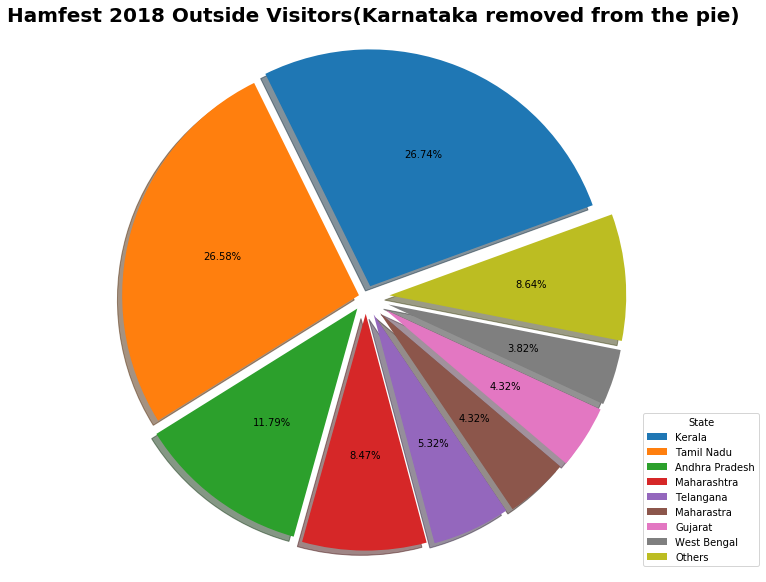

In [11]:
# Pie Chart Showing statewide distribution
fig1,ax1 = plt.subplots()
ax1.pie(major_states[1:], explode = (0.05,0.03,0.06,0.07,0.08,0.09,0.1,0.1,0.1), autopct='%1.2f%%',
       shadow = True, startangle = 20)
ax1.legend(major_states[1:].index,title ='State', loc = 'lower right',bbox_to_anchor = (1.1,0,0.1,6))
ax1.axis('equal')
fig1.set_figheight(10)
fig1.set_figwidth(10)
plt.title("Hamfest 2018 Outside Visitors(Karnataka removed from the pie)", fontdict= {'fontsize': 20,
                                     'fontweight' : 1000,
                                     'verticalalignment': 'baseline','horizontalalignment': 'center'})
plt.show()

In [12]:
calls = list(hams["Callsign"])

In [13]:
#calls

In [14]:
calls2 = calls[:]
for i in calls:
    if "VU3" in i or "VU2" in i or "SWL" in i or "SLW" in i or "SWK" in i or "SW" == i:
        calls2.remove(i)
print("Notable callsigns not in VU2 and VU3 Series: ", calls2)

Notable callsigns not in VU2 and VU3 Series:  ['N9SFK', 'KD0NER', 'VA3UMA', 'VA3RNY', 'KD0NFG', 'VIT', 'KC9ZJX', 'KD9LLR', 'KC9ZJG']


In [15]:
vu2 = 0
vu3 = 0
SWL = 0
for i in calls:
    if "VU2" in i:
        vu2 = vu2 + 1
    elif "VU3" in i:
        vu3 = vu3 + 1
    elif "SWL" in i or "SLW" in i or "SWK" in i or "SW" == i:
        SWL = SWL + 1
print("Hams with VU2 Callsigns:   ", vu2,"\nHams with VU3 Callsigns:   ",vu3,"\nShortwave listners(SWLs):  ",
      SWL,"\nHams with Other Callsigns: ",len(calls)-vu2-vu3-SWL)

Hams with VU2 Callsigns:    304 
Hams with VU3 Callsigns:    523 
Shortwave listners(SWLs):   472 
Hams with Other Callsigns:  9


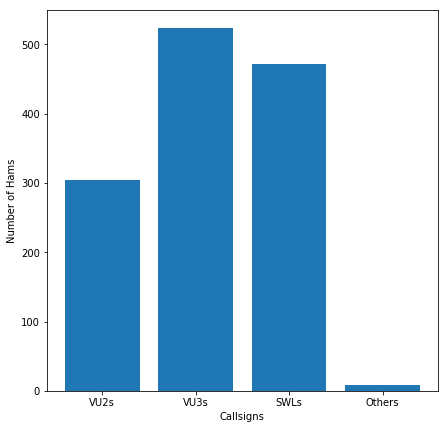

In [16]:
fig1,ax1 = plt.subplots()
ax1.bar(["VU2s","VU3s","SWLs","Others"],[vu2,vu3,SWL,len(calls)-vu2-vu3-SWL])
plt.xlabel("Callsigns")
plt.ylabel("Number of Hams")
fig1.set_figheight(7)
fig1.set_figwidth(7)
plt.show()

In [25]:
cities = hams["City"]
cities = cities.replace(["BANGALORE","Bangalore"],
                        ["Bengaluru","Bengaluru"])
print("Top Cities: ")
cities.value_counts().head(20)

Bengaluru             599
Chennai                28
Mumbai                 21
Thiruvananthapuram     15
HYDERABAD              14
Pune                   14
CHENNAI                14
VIJAYAWADA             13
Hyderabad              13
Coimbatore             13
MUMBAI                 11
NELLORE                10
THIRUVANANTHAPURAM      9
KOLKATA                 9
WEST GODAVARI           9
KOLLAM                  8
Kolkata                 8
VELLORE                 8
MADURAI                 7
USA                     7
Name: City, dtype: int64